# Error Mitigation through ancillas

Since parity and total magnetization are conserved quantities during time evolution we want to use the four free ancillas as a check for a mitigation.
Here the list of check-circuit that we test:
* Copy check & 4Copy Check
* Parity Measurement with one ancilla & two ancillas
* Magnetization Measurement

### Notation
Firstly, we would like to introduce the notation that we will use to describe the different circuits:

* We'll call control qubits those that are used to simulate time evolution given by the Hamiltonian
* We'll call ancillas those that are used to implement error mitigation

In the images of the circuits the qubits order corrispond to the Jakarta so qubits[1,3,5]= control qubits and qubits[0,2,4,6]=ancillas



In [1]:
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.providers.aer import AerSimulator, QasmSimulator
import numpy as np


/home/djanloo/.virtualenvs/valerio_amico_quantum_00-26iBho32/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/djanloo/.virtualenvs/valerio_amico_quantum_00-26iBho32/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/djanloo/.virtualenvs/valerio_amico_quantum_00-26iBho32/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/djanloo/.virtualenvs/valerio_amico_quantum_00-26iBho32/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  retur

## Copy Check

Let see the copy check's circuit:



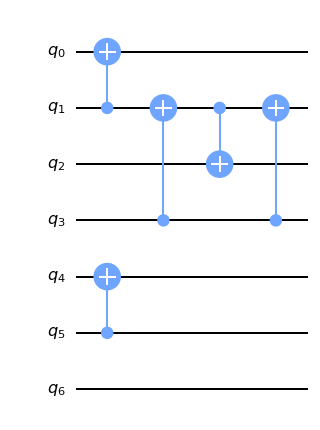

In [2]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
#qc.cx(qr[5],qr[6])
qc.cx(qr[5],qr[4])
qc.cx(qr[3],qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[3],qr[1])

qc.draw(output='mpl')

### Circuit analysis
We have as input state a generic overlap of the magnetization=2 Hilbert subspace:
$ |\psi_{in}⟩ = \alpha |011⟩+\beta|101⟩+\gamma|110⟩ $,

The initial global state (considering also the ancillas) is:

$|\psi_{tot}⟩=|\psi_{in}⟩ \otimes |000⟩ $.

Applying the check circuit gives:

$|\psi_{tot}⟩ = \alpha|011⟩|011⟩+\beta|101⟩|101⟩+\gamma|110⟩|110⟩$ 


If no errors as occurred one should measure the ancillas qubits state with magnetization=2, so we reject all data that does not respect this constraint. 


Since the final state $|\psi_{tot}⟩$ cannot be write as a tensor product between control qubits state and ancillas state is important to measure the ancillas qubits after the tomography circuit.
### Sum up
* allowed ancillas coditions: $[|110⟩, |101⟩, |011⟩]$
* 5 Cnots

## 4Copy Check
Since we have another free ancilla we decide to copy control qubit 5 two times on qubits 4 and 6 as in figure:









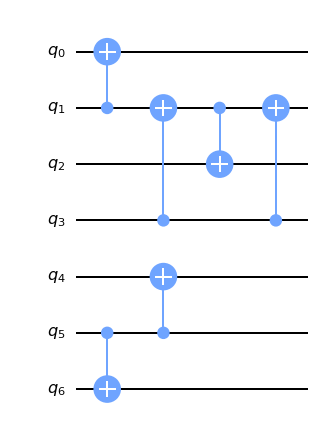

In [3]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.cx(qr[5],qr[6])
qc.cx(qr[5],qr[4])
qc.cx(qr[3],qr[1])
qc.cx(qr[1],qr[2])
qc.cx(qr[3],qr[1])

qc.draw(output='mpl')

In addition to the constraint magnetization=2 on qubits [0,2,4] now we have the constraint that ancillas [4,6] must have same measurement result.

### Sum up

* allowed ancillas conditions: $[|1100⟩, |1011⟩, |0111⟩]$
* 6 cnots 

## Parity Measurement with one ancilla
Here the circuit for parity measurement one ancilla:
 







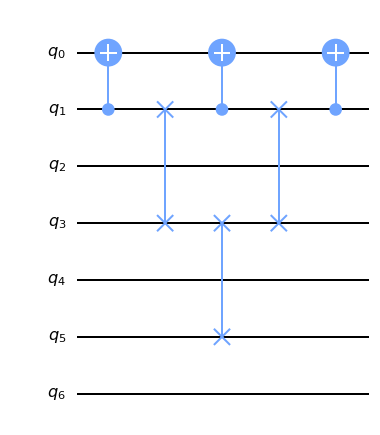

In [4]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.cx(qr[1],qr[0])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.draw(output='mpl')

### Circuit Analysis
Suppose we have as input state a generic state of the Hilbert's Space: 

$ |\psi_{in}⟩ = |\psi_{even}⟩+|\psi_{odd}⟩ $ 

where:

* $|\psi_{even}⟩ = \alpha_0|000⟩+\beta_0|110⟩+\gamma_0|101⟩+\delta_0|011⟩ $
* $|\psi_{odd}⟩ = \alpha_1|100⟩+\beta_1|010⟩+\gamma_1|001⟩+\delta_1|111⟩ $

Considering also the ancilla we have as total input state:

$|\psi_{tot}⟩=|\psi_{even}⟩\otimes|0⟩+|\psi_{odd}⟩\otimes|0⟩ $.

Applying the circuit gives as total output state:

$|\psi_{tot}⟩=|\psi_{even}⟩\otimes|0⟩+|\psi_{odd}⟩\otimes|1⟩ $.

Since parity is conserved during time evolution and the initial state belong to the even subspace, if we don't measure |0⟩ on the ancilla the data is reject.

The output state from the check circuit is in the form $ |\psi_{even}⟩\otimes|0⟩ $ so the ancilla can be measure before the control qubits and allow us to do mid-measurements.

The SWAP gates, compose by three C-NOT gates, are needed due to the geometry of Jakarta so the total number of C-NOT needed to implement the check is twelve. That increase, not trivially, the lenght of the circuit.

After the circuit the control qubits 1 and 5 are swapped.


### Sum up

* allowed ancilla condition: |0⟩
* check circuit swap qubit 1 and 5









### Parity Measurement two ancillas
Here the circuit parity Measurements with two ancillas:

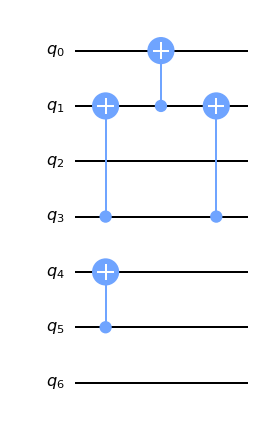

In [5]:
qr1=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr1)
qc.cx(qr1[5],qr1[4])
qc.cx(qr1[3],qr1[1])
qc.cx(qr1[1],qr1[0])
qc.cx(qr1[3],qr1[1])
qc.draw(output='mpl')

### Circuit analysis
Let's take as input state a generic overlap of even subspace:

$|\psi_{in}⟩=\alpha|000⟩+\beta|110⟩+\gamma|101⟩+\delta|011⟩$.

The initial global state considering ancillas is:

$|\psi_{tot}⟩=|\psi_{in}⟩\otimes|00⟩ $.

Applying the check circuit gives as total ouput state:

$ |\psi_{tot}⟩=(\alpha|000⟩+\beta|110⟩)\otimes|00⟩+(\gamma|101⟩+\delta|011⟩)\otimes|11⟩ $.

If in input we have a generic odd state as total output state we have:

$ |\psi_{tot}⟩=(\alpha|100⟩+\beta|010⟩)\otimes|10⟩+(\gamma|001⟩+\delta|111⟩)\otimes|01⟩ $ 

So if don't measure on the ancillas |00⟩ or |11⟩ we reject the data.

Differently from the parity check one ancilla, in this case control qubits must be measure before ancillas.



### Sum up 

* allowed ancillas condition: $ [|00⟩, |11⟩]$
* 4 cnots



# Magnetization Measurement




Firstly we have to introduce che C-S (control-s) gate:

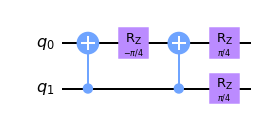

In [11]:
pi=np.pi
qr=QuantumRegister(2,name='q')
CS_qc=QuantumCircuit(qr,name='C-S')

CS_qc.cx(qr[1],qr[0])
CS_qc.rz(-pi/4,qr[0])
CS_qc.cx(qr[1],qr[0])
CS_qc.rz(pi/4,qr[0])
CS_qc.rz(pi/4,qr[1])


CS_qc.draw(output='mpl')

### Circuit analysis
The C-S gate act, on the 2-qubit computationial base, as an identity except for the state |11⟩ to which add a phase $\phi = i$.

Let's consider a generic 2-qubit state as input:

$|\psi_{in}⟩=\alpha|00⟩+\beta|01⟩+\gamma|10⟩+\delta|11⟩$ 

Applying the C-S gives:

$|\psi_{out}⟩=\alpha|00⟩+\beta|01⟩+\gamma|10⟩+i*\delta|11⟩$ 

Let's see now the magnetization check circuit:





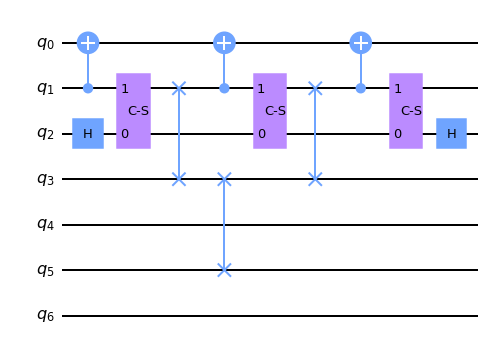

In [12]:
qr=QuantumRegister(7,name='q')
qc=QuantumCircuit(qr)

qc.h(qr[2])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.swap(qr[5],qr[3])
qc.swap(qr[1],qr[3])
qc.cx(qr[1],qr[0])
qc.append(CS_qc,[qr[2],qr[1]])
qc.h(qr[2])
qc.draw(output='mpl')

### Circuit Analysis
On ancilla 0 we measure parity of the control qubits state  while on ancilla 2, initialized as $|+⟩$ C-S gate is applied for each control qubits. If control qubits have total magnetization=2 a phase $\phi=i^2=-1$ is added to the $|1⟩$ part of the $|+⟩$  given $|-⟩$ Hadamad state. After that, applying H gate, gives $|1⟩$ as ancilla 2 output state.

Let's see how this circuit acts on different magnetization states:

* State with magnetization=0 $|\psi_{in}⟩=|000⟩\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=|000⟩\otimes|00⟩ $


* State with magnetization=1 $|\psi_{in}⟩=(\alpha|100⟩+\beta|010⟩+\gamma|001⟩)\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=(\alpha|100⟩+\beta|010⟩+\gamma|001⟩)\otimes\frac{1}{2}((1+i)|10⟩+(1-i)|11⟩)$


* State with magnetization=2 $|\psi_{in}⟩=(\alpha|110⟩+\beta|101⟩+\gamma|011⟩)\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=(\alpha|110⟩+\beta|101⟩+\gamma|011⟩)\otimes|01⟩$ 


* State with magnetization=3 $|\psi_{in}⟩=|111⟩\otimes|0+⟩$

Output state after magnetization check $|\psi_{out}⟩=|111⟩\otimes\frac{1}{2}((1-i)|10⟩+(1+i)|11⟩) $

As we can see if we don't measure on the ancillas $|01⟩$ we can reject the data because magnetization was not conserved during time evolution. 

Total output state is in the form $|control qubit⟩ \otimes |ancillas⟩$ so this circuit can be used to perform mid-measurements.

SWAP gates are added due to the geometry of Jakarta.

The streght of this check circuit is that, instead of three ancillas needed for the copy check circuit, here we only need two ancillas to check the magnetization

After the check circuit the control qubit 1 and 5 are swaped.

### Sum up

* allowed ancillas conditions: $|01⟩$

* circuit swap qubit 1 and 5 

* 18 cnots 



## Conclusion

We tested all the check that we presented, for this specific case the 4Copy check outperform the others.
